## Credit Card Data analysis

Segmentation in marketing is a technique used to divide customers or other entities into groups based on attributes such as behaviour or demographics.

The top challenge faced by marketers is understanding who they are selling to. Once you know your buyer personas, you can tailor your targeting and offerings to increase their satisfaction and your revenue as a result. When you already have a pool of customers and plenty of data, it can be incredibly useful to segment them.

Here we will be using Credit card data to segment the customers.

## About the dataset
The credit card data has 18 attributes for each customer, which include the balance (credit owed by the customer), cash advance (when a customer withdraws cash using the credit card), the customer’s credit limit, minimum payment, percentage of full payments and tenure. A complete data dictionary info is given below:




|Feature|Description|
|-----|-----|
|CUST_ID| Identification of Credit Card holder (Categorical)| 
|BALANCE | Balance amount left in their account to make purchases| 
|BALANCE_FREQUENCY | How frequently the Balance is updated, score between 0 and 1(1 = frequently updated, 0 = not frequently updated |
|PURCHASES | Amount of purchases made from account| 
|ONEOFF_PURCHASES | Maximum purchase amount done in one-go| 
|INSTALLMENTS_PURCHASES | Amount of purchase done in installment| 
|CASH_ADVANCE | Cash in advance given by the user |
|PURCHASES_FREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
|ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
|PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
|CASHADVANCEFREQUENCY | How frequently the cash in advance being paid |
|CASHADVANCETRX | Number of Transactions made with "Cash in Advanced" |
|PURCHASES_TRX | Numbe of purchase transactions made |
|CREDIT_LIMIT | Limit of Credit Card for user| 
|PAYMENTS | Amount of Payment done by user |
|MINIMUM_PAYMENTS | Minimum amount of payments made by user| 
|PRCFULLPAYMENT | Percent of full payment paid by user |
|TENURE | Tenure of credit card service for user|

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
from os.path import abspath, dirname, join

## For extra knowledge
https://digital.hbs.edu/platform-rctom/submission/metlife-a-case-study-in-customer-segmentation/#_edn3


### Loading the dataset

In [2]:
folder_name = dirname(abspath('.'))
path = os.path.join(folder_name,'data\customer_seg.csv')
ccdata = pd.read_csv(path)
ccdata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Lets check the descriptive Statistics of the data.

In [3]:
ccdata.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


It seems like data have many outliers. The variable like `BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, PURCHASE_TRX, CREDIT_LIMIT, PAYMENTS and MINIMUM_PAYMENTS` have outliers. Let's treat using log-transformation before standardizing.

In [4]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Dealing with missing values
Lets check the number of missing values in the given dataset

In [5]:
ccdata.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We see only two features have null values ‘CREDIT_LIMIT’ and ‘MINIMUM_PAYMENTS’.

### Impute these missing values with mean and remove `CUST_ID` which is not useful.

In [7]:
ccdata = ccdata.drop('CUST_ID', axis = 1)

In [8]:
ccdata['CREDIT_LIMIT'].fillna(ccdata['CREDIT_LIMIT'].mean(), inplace = True)

In [9]:
ccdata['MINIMUM_PAYMENTS'].median()

312.343947

In [10]:
ccdata['TOTAL_TRXS'] = ccdata['PURCHASES'] + ccdata['ONEOFF_PURCHASES'] + ccdata['INSTALLMENTS_PURCHASES'] + ccdata['CASH_ADVANCE']
inactive_customers = ccdata[ccdata['TOTAL_TRXS'] == 0]
inactive_customers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_TRXS
2221,391.385478,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0,0,4000.0,192.787345,227.924469,0.0,12,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1aa62cda130>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa62cda790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa62cbae20>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa62cdac70>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1aa62cdaf40>]}

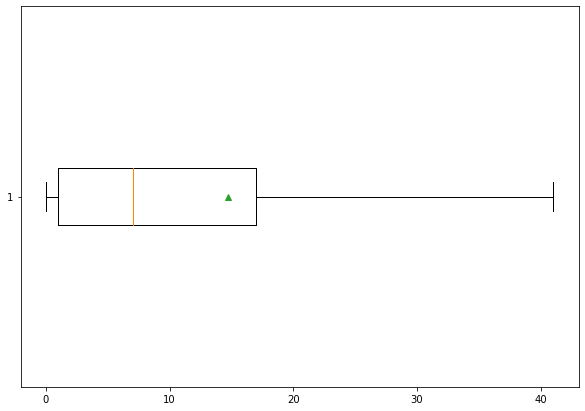

In [11]:
# Plot distribution of purchases
plt.figure(figsize =(10,7))
plt.boxplot(ccdata['PURCHASES_TRX'], vert = False, showmeans = True, showfliers = False)


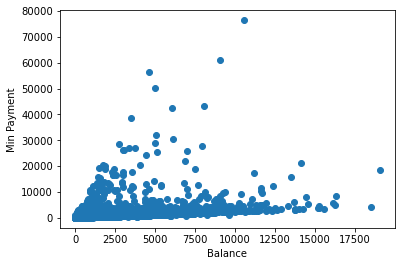

In [12]:
# Scatterplot
plt.scatter(ccdata['BALANCE'],ccdata['MINIMUM_PAYMENTS'])
plt.xlabel('Balance')
plt.ylabel('Min Payment')
plt.show()

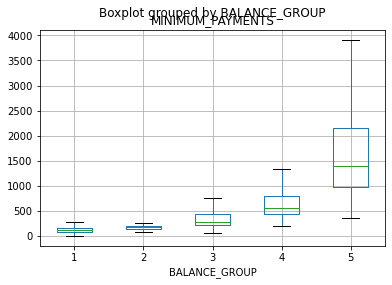

In [13]:
ccdata['BALANCE_GROUP'] = pd.qcut(ccdata['BALANCE'], 5, labels=[1, 2, 3, 4, 5])

ccdata.boxplot(column='MINIMUM_PAYMENTS', by='BALANCE_GROUP', showfliers=False)
plt.show()

In [14]:
pd.qcut(ccdata['BALANCE'], 5)

0            (-0.001, 77.238]
1       (2571.434, 19043.139]
2        (1207.816, 2571.434]
3        (1207.816, 2571.434]
4         (467.022, 1207.816]
                ...          
8945         (-0.001, 77.238]
8946         (-0.001, 77.238]
8947         (-0.001, 77.238]
8948         (-0.001, 77.238]
8949        (77.238, 467.022]
Name: BALANCE, Length: 8950, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 77.238] < (77.238, 467.022] < (467.022, 1207.816] < (1207.816, 2571.434] < (2571.434, 19043.139]]

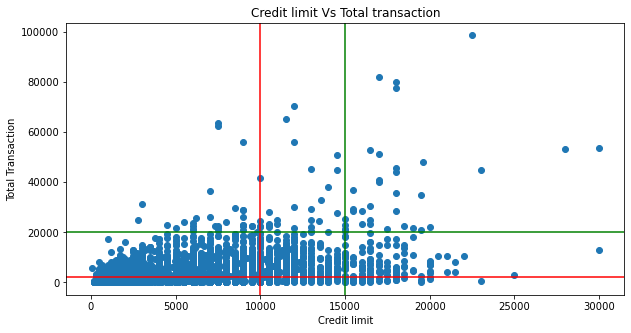

In [15]:
# lets draw scatter plot credit limit and total transactions
plt.figure(figsize = (10,5))
plt.scatter(ccdata['CREDIT_LIMIT'],ccdata['TOTAL_TRXS'])
plt.title('Credit limit Vs Total transaction')
plt.xlabel('Credit limit')
plt.ylabel('Total Transaction')
plt.axhline(2000, color = 'red')
plt.axvline(10000, color = 'red')
plt.axhline(20000, color = 'green')
plt.axvline(15000, color = 'green')
plt.show()

### Perform log transformation on the data

In [16]:
ccdata['MINIMUM_PAYMENTS'] = ccdata['MINIMUM_PAYMENTS'].fillna(ccdata.groupby('BALANCE_GROUP')['MINIMUM_PAYMENTS'].transform('median'))
ccdata.dropna(inplace = True)
ccdata.isnull().sum()
ccdata.shape

(8950, 19)

In [17]:
features = ccdata.copy()
cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

# Note: Adding 1 for each value to avoid inf values
features[cols] = np.log(1 + features[cols])
features.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_TRXS,BALANCE_GROUP
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,190.800000,1
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12,6442.945483,5
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,1546.340000,4
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.327816,0.000000,12,3203.788017,4
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,32.000000,3


###  Detect outliers in the continuous columns 

As this is a clustering problem, I decided to test without outlier's replacement because to get the meaningful clusters and should make sense after plotting the pair graph.  

We will be Using IRQ Score to identify outliers values in dataset. IRQ method is used in boxplot to identify possible outliers values.

```python
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
```
For now, we`ll do nothing with outliers because this may harm the clustering.

In [18]:
# Code starts here

# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(features)

BALANCE --------- 132
BALANCE_FREQUENCY --------- 1493
PURCHASES --------- 0
ONEOFF_PURCHASES --------- 0
INSTALLMENTS_PURCHASES --------- 0
CASH_ADVANCE --------- 0
PURCHASES_FREQUENCY --------- 0
ONEOFF_PURCHASES_FREQUENCY --------- 782
PURCHASES_INSTALLMENTS_FREQUENCY --------- 0
CASH_ADVANCE_FREQUENCY --------- 525
CASH_ADVANCE_TRX --------- 15
PURCHASES_TRX --------- 0
CREDIT_LIMIT --------- 6
PAYMENTS --------- 318
MINIMUM_PAYMENTS --------- 152
PRC_FULL_PAYMENT --------- 1474
TENURE --------- 1366
TOTAL_TRXS --------- 651


### Visualize the outliers using box plot

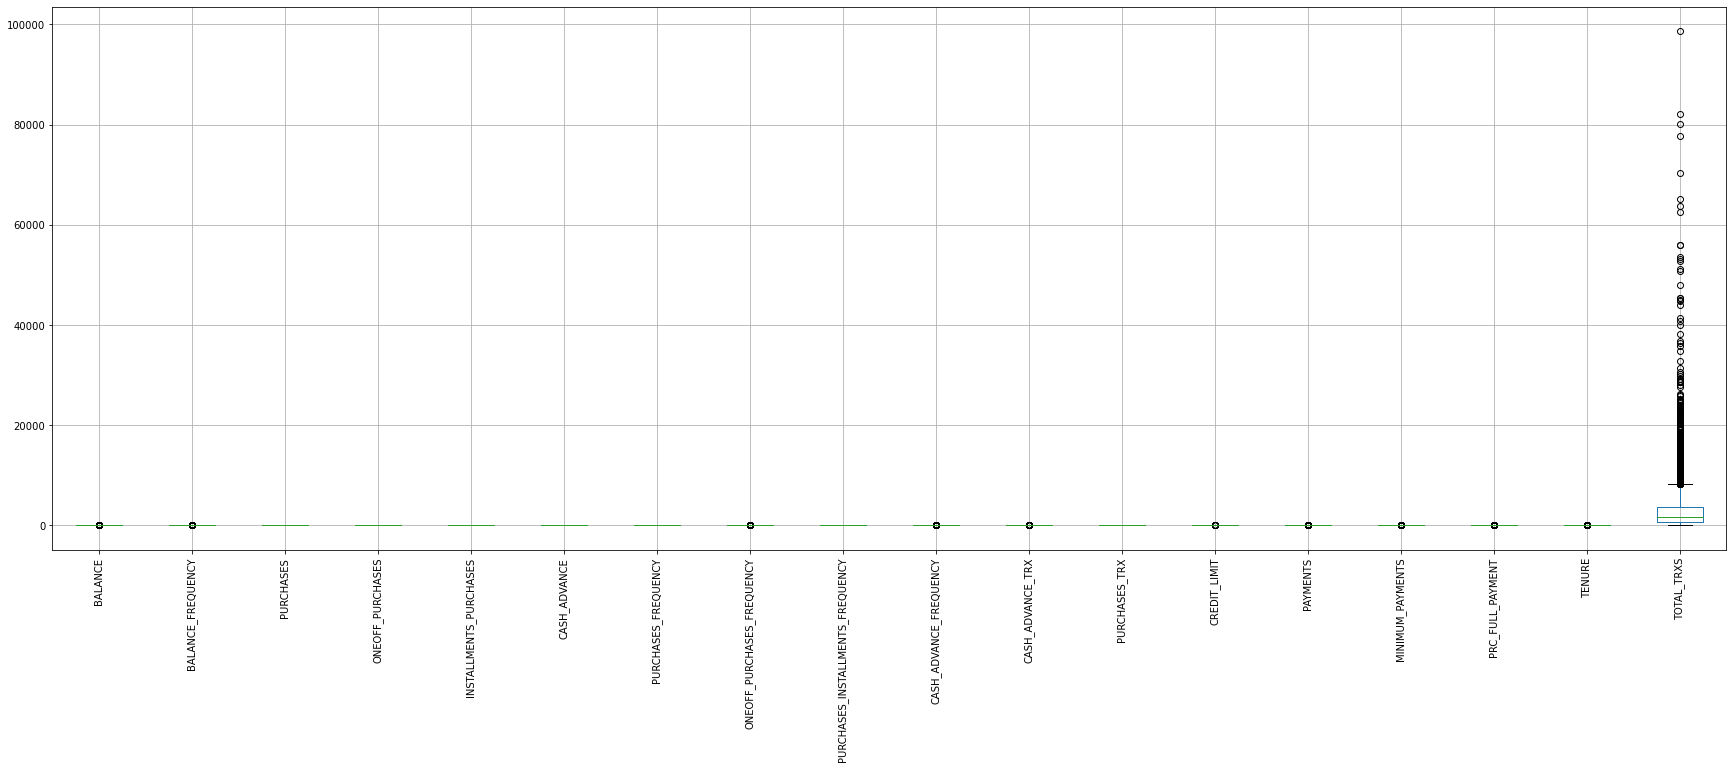

In [19]:
features.boxplot(rot=90, figsize=(30,10))
plt.show()

### Scale the features using scale function. This function will put all variables at the same scale, with mean zero and standard deviation equals to one.

In [20]:
# Scale All features
cols = list(features)
for col in cols:
    features[col] = scale(np.array(features[col]))

features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_TRXS,BALANCE_GROUP
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447207,-0.824484,-0.804209,-0.525551,0.36068,-0.599482,-1.414214
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.925998,1.065033,0.912587,0.234227,0.36068,0.741606,1.414214
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010166,-0.119300,0.460401,-0.525551,0.36068,-0.308718,0.707107
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010166,-4.161996,0.363150,-0.525551,0.36068,0.046805,0.707107
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224955,-0.064979,-0.332039,-0.525551,0.36068,-0.633544,0.000000


### Applying KMeans to the dataset with the optimal number of cluster and store the clusters in the dataframe.

In [50]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
X = np.array(features)

In [51]:
# Applying KMeans to the dataset with the optimal number of cluster
kmeans=KMeans(n_clusters= 6, random_state = 0)

cluster_labels = kmeans.fit_predict(X)

# adding clusters to main dataframe
clusters=pd.concat([features, pd.DataFrame({'cluster':cluster_labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_TRXS,BALANCE_GROUP,cluster
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.678661,-0.707313,-0.675349,-0.810069,-0.579510,-1.447207,-0.824484,-0.804209,-0.525551,0.36068,-0.599482,-1.414214,0
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.678661,-0.916995,0.573963,0.784603,-1.379210,0.925998,1.065033,0.912587,0.234227,0.36068,0.741606,1.414214,1
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.673451,-0.916995,-0.675349,-0.810069,0.487865,1.010166,-0.119300,0.460401,-0.525551,0.36068,-0.308718,0.707107,5
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.399319,-0.916995,-0.258913,-0.123281,-0.874655,1.010166,-4.161996,0.363150,-0.525551,0.36068,0.046805,0.707107,5
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.399319,-0.916995,-0.675349,-0.810069,-0.874655,-1.224955,-0.064979,-0.332039,-0.525551,0.36068,-0.633544,0.000000,5


### Interpretation of Clusters

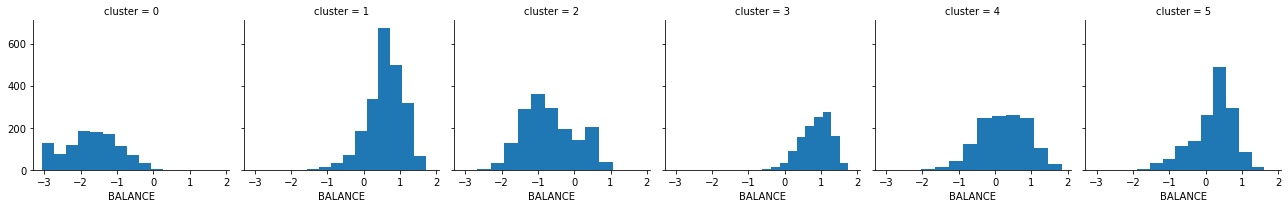

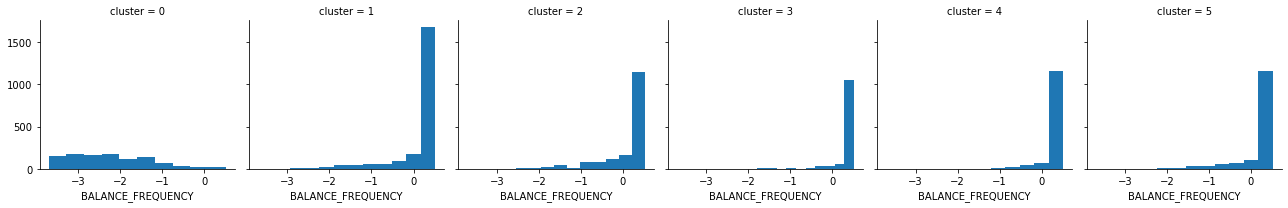

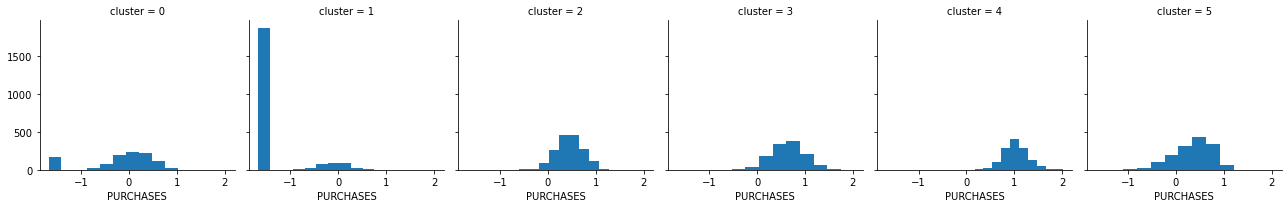

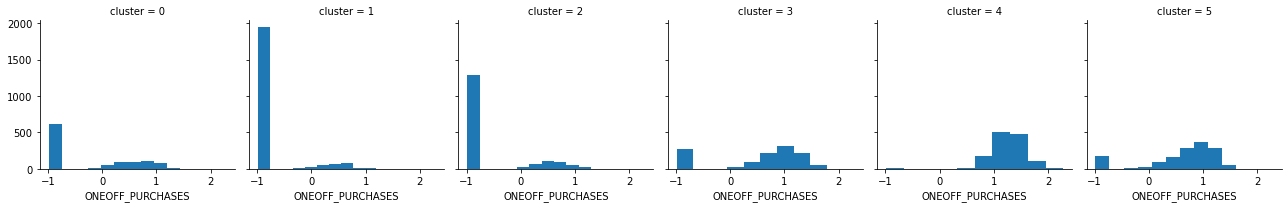

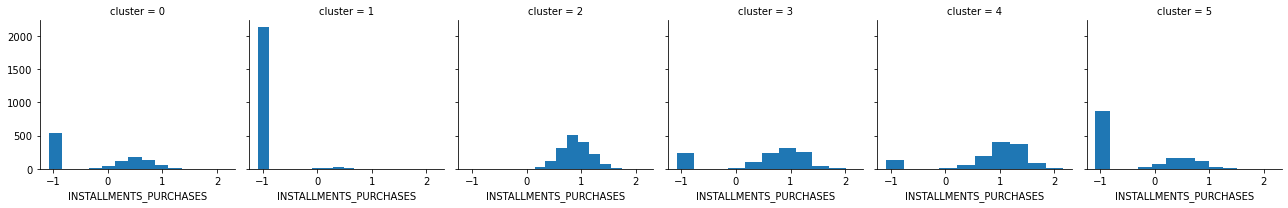

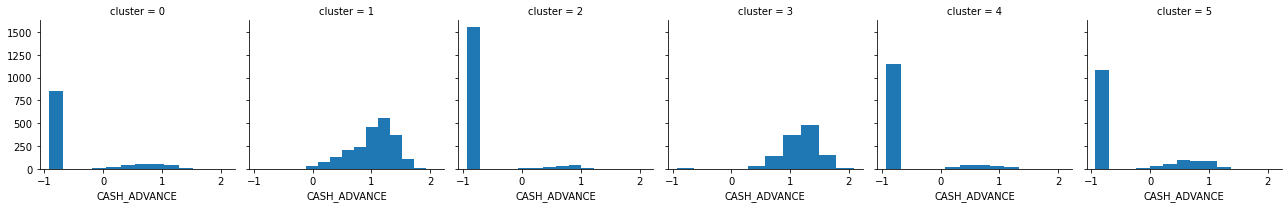

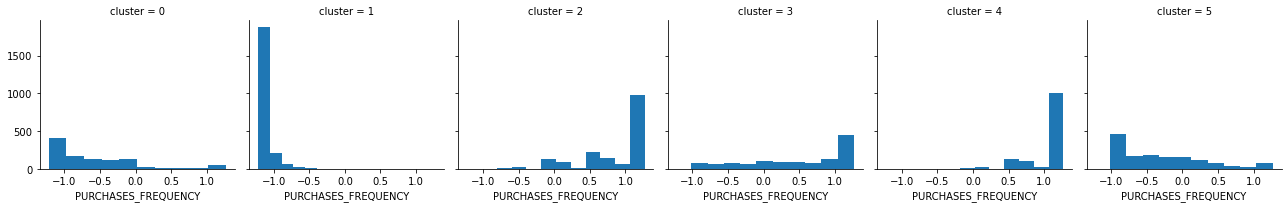

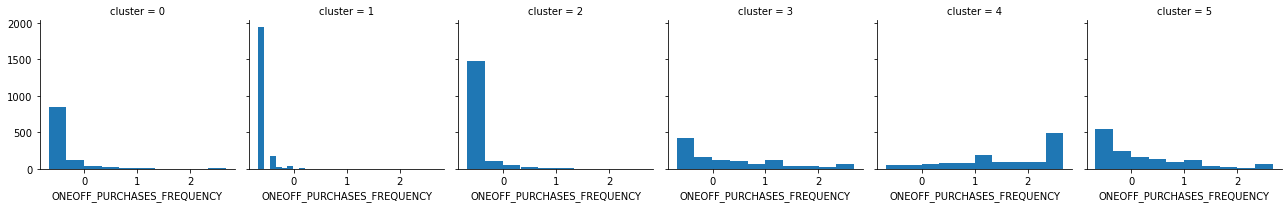

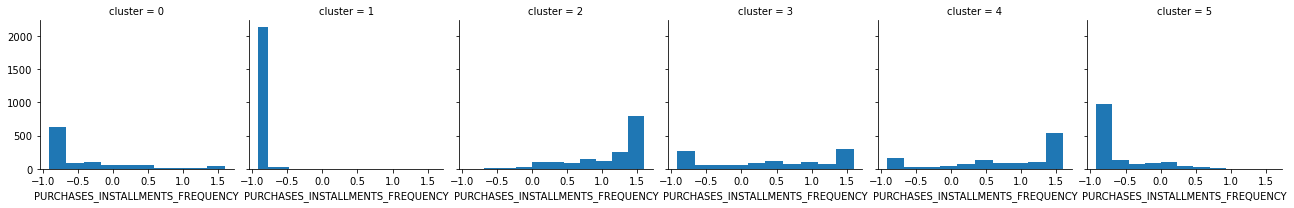

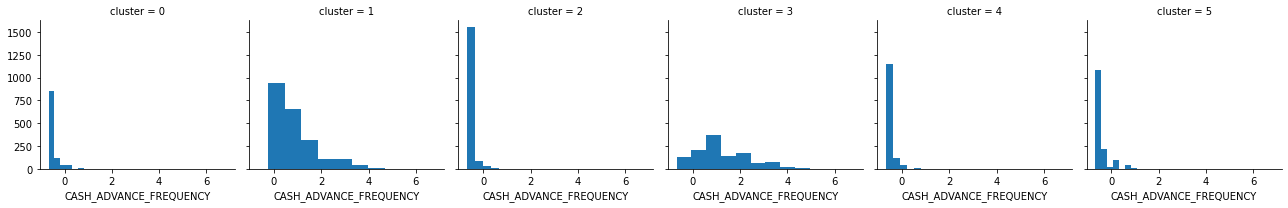

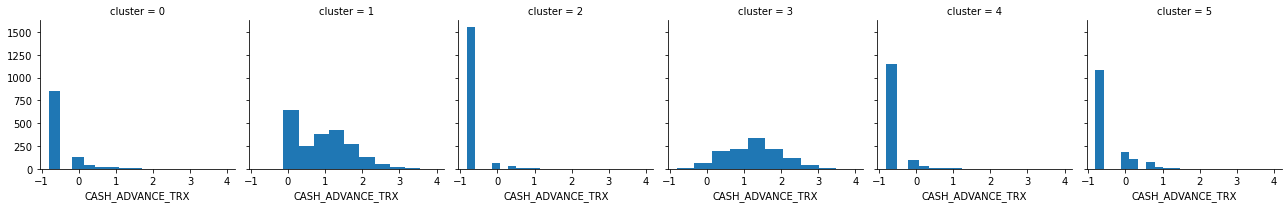

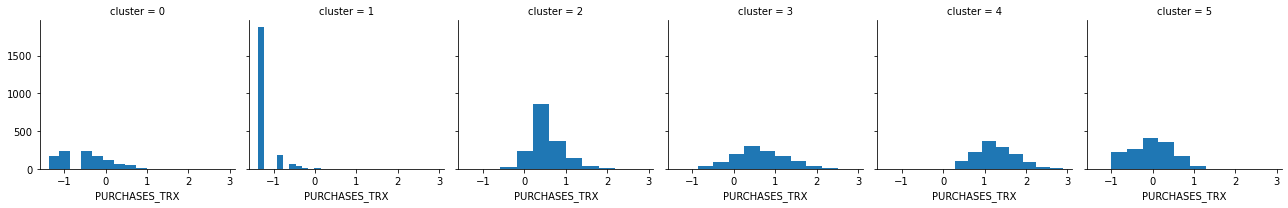

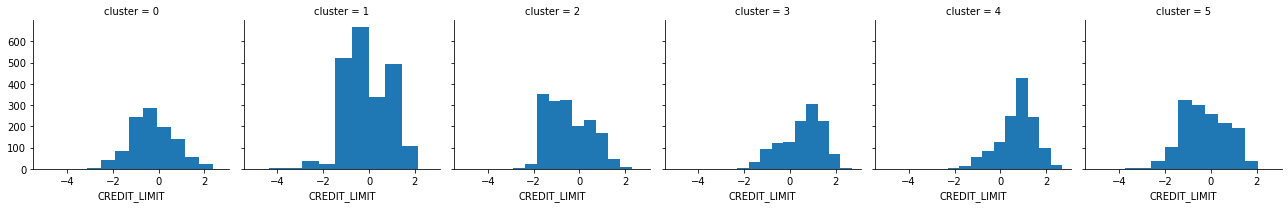

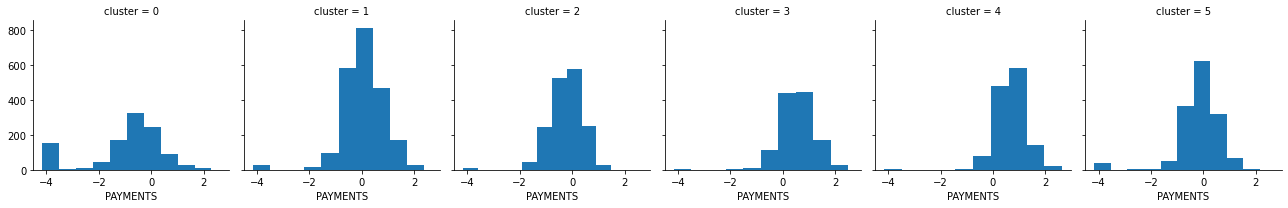

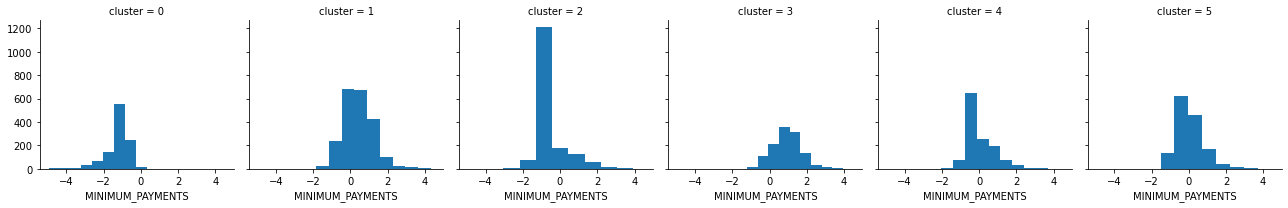

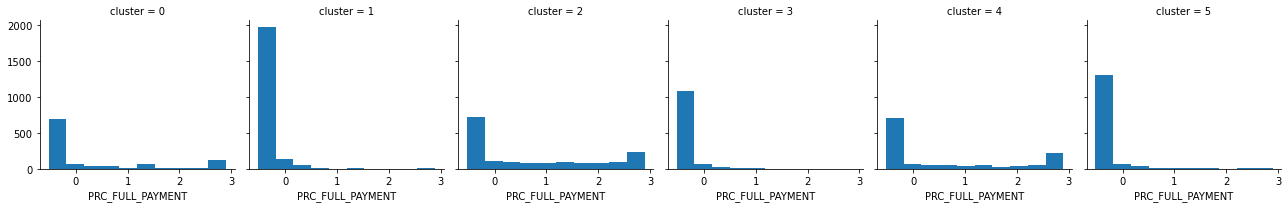

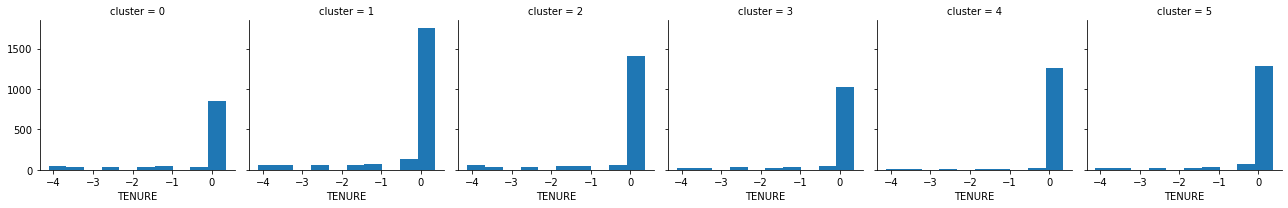

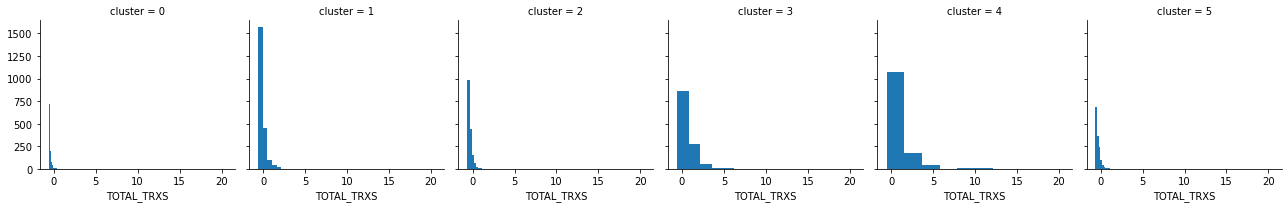

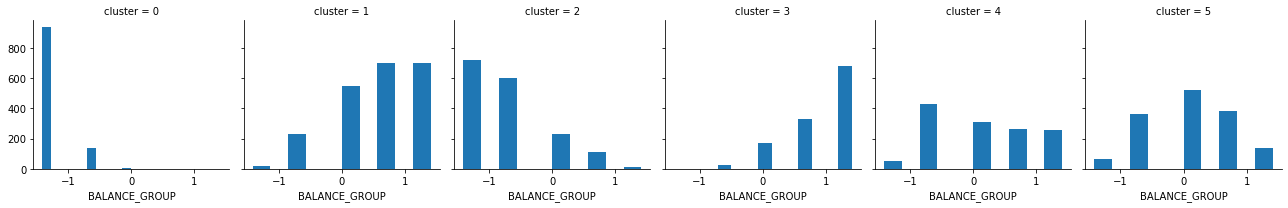

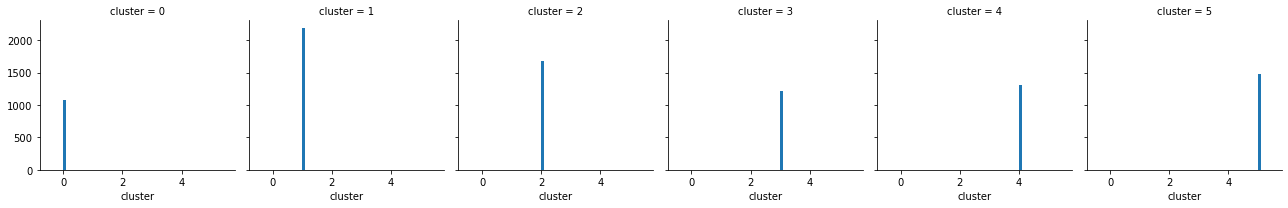

In [52]:
import seaborn as sns
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

**Insights:**

**Cluster 0** People with average to high credit limit who make all type of purchases

**Cluster 1** People with high credit limit who take more cash in advance

**Cluster 2** High spenders with high credit limit who make expensive purchases

**Cluster 3** Less money spenders with average to high credit limits who purchases mostly in installments

**Cluster 4** People who don't spend much money and who have average to high credit limit

**Cluster 5** This group has more people with due payments who take advance cash more often

### Visualization of Clusters, use PCA to transform data to 2 dimensions for visualization

In [53]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

distance = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(distance)
X_PCA = pca.transform(distance)
X_PCA.shape

(8950, 2)

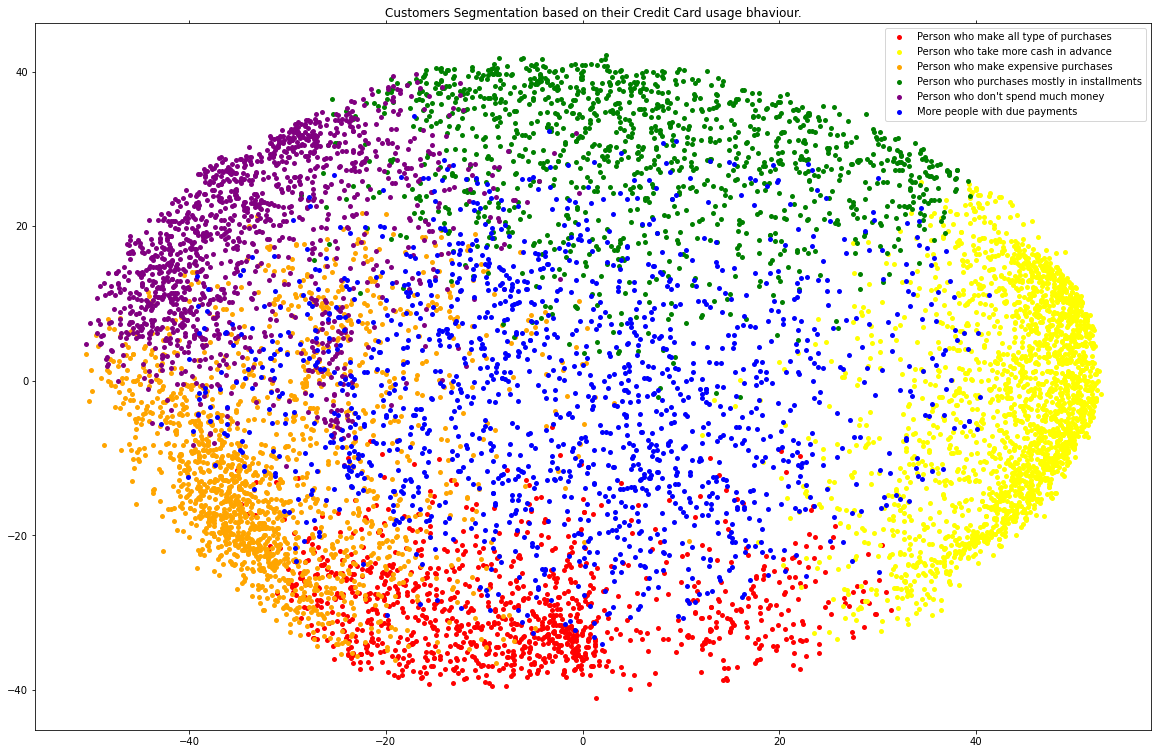

In [54]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'yellow',
          2: 'orange', 
          3: 'green', 
          4: 'purple',  
          5: 'blue'}

names = {0: 'Person who make all type of purchases' , 
         1: 'Person who take more cash in advance' ,
         2:  'Person who make expensive purchases' ,
         3: 'Person who purchases mostly in installments', 
         4: 'Person who don\'t spend much money',
         5: 'More people with due payments'}
  
df1 = pd.DataFrame({'x': x, 'y':y, 'label':cluster_labels}) 
groups = df1.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()
